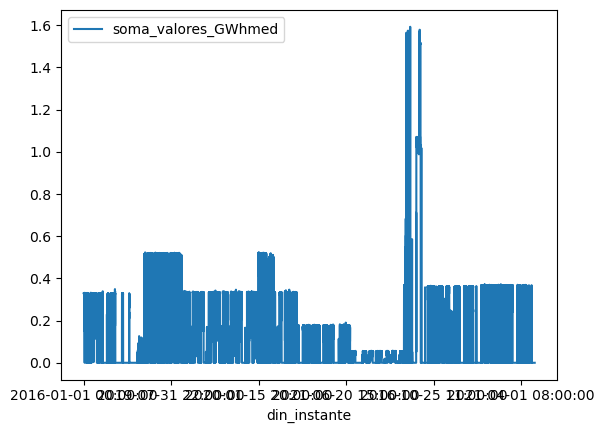

In [13]:
#series visualization
import pandas as pd
from pandas import read_csv
import datetime
import seaborn as sns
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
 
df = pd.read_csv('GERACAO_USINA_16-22_CEG_DIA_NOM-USINA_SOMA_GERACAO_GWh.csv')

df.plot(x="din_instante", y="soma_valores_GWhmed")
pyplot.savefig('gwhmed.png')
pyplot.show()

#autocorrelation_plot(df)
#pyplot.show()

             din_instante  soma_valores_GWhmed
61149 2022-02-15 00:00:00             0.000000
61150 2022-02-15 01:00:00             0.006666
61151 2022-02-15 02:00:00             0.042309
61152 2022-02-15 03:00:00             0.047924
61153 2022-02-15 04:00:00             0.047908
din_instante           datetime64[ns]
soma_valores_GWhmed           float64
dtype: object


21:13:32 - cmdstanpy - INFO - Chain [1] start processing
21:13:34 - cmdstanpy - INFO - Chain [1] done processing


                   ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2022-02-15 00:00:00  1.695101e-13 -1.765316e-14  4.886890e-13  1.695101e-13   
1 2022-02-15 01:00:00  1.696391e-13 -1.840562e-14  4.534301e-13  1.696391e-13   
2 2022-02-15 02:00:00  1.697682e-13 -1.165664e-14  4.704492e-13  1.697682e-13   
3 2022-02-15 03:00:00  1.698972e-13 -1.142184e-14  4.704026e-13  1.698972e-13   
4 2022-02-15 04:00:00  1.700262e-13 -2.997368e-14  4.674943e-13  1.700262e-13   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  1.695101e-13    6.687309e-14          6.687309e-14          6.687309e-14   
1  1.696391e-13    6.249610e-14          6.249610e-14          6.249610e-14   
2  1.697682e-13    6.046374e-14          6.046374e-14          6.046374e-14   
3  1.698972e-13    5.941005e-14          5.941005e-14          5.941005e-14   
4  1.700262e-13    5.314871e-14          5.314871e-14          5.314871e-14   

          daily   daily_lower   daily_

C:\Users\Artuba\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Artuba\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


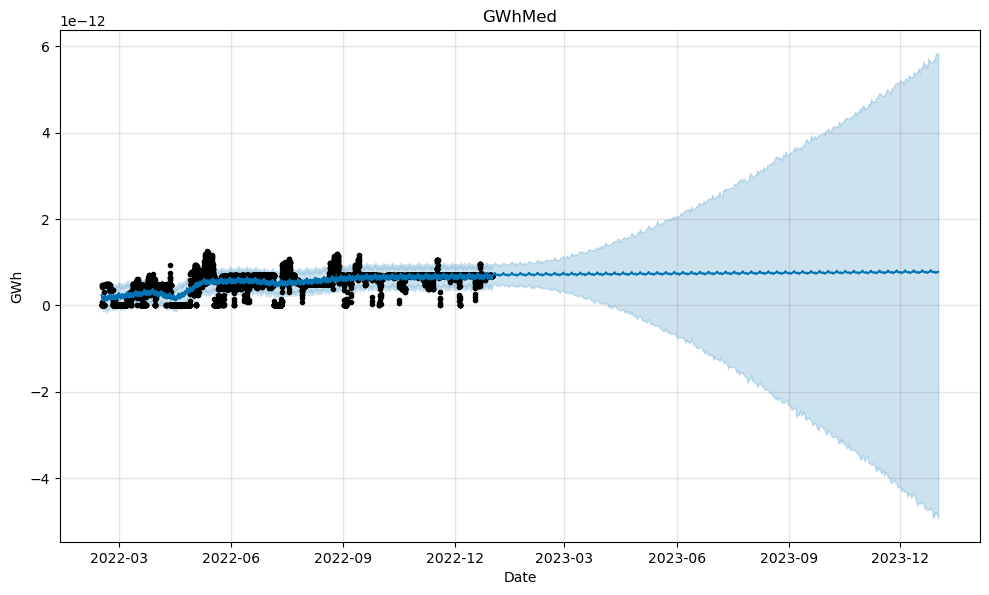

In [47]:
# Plotando um modelo FACEBOOK PROPHET e residual errors
import pandas as pd
import datetime
import prophet
from pandas import read_csv
from pandas import DataFrame
from matplotlib import pyplot

# load dataset
df = pd.read_csv('GERACAO_USINA_16-22_CEG_DIA_NOM-USINA_SOMA_GERACAO_GWh.csv')
df = df.loc[df['nom_usina'] == ('Jaguatirica II')] 
#mudar a usina cada rodada. Porto do Itaqui, Pecém II, Parnaíba IV, Parnaíba V, Jaquatirica II, Porto de Sergipe I, Fortaleza.

df['din_instante'] = pd.to_datetime(df['din_instante']) #.dtypes #transformar para o tipo datetime caso aja erro na hora de upar
i = df[(df.din_instante > '2023-01-01 00:00:00')].index #filtro de datas que está na ordem decrescente
df = df.drop(i)
df = df.drop(['nom_usina', 'QUARTER'], axis=1)
print(df.head())
print(df.dtypes)


# Prophet requires columns ds (Date) and y (value)
df = df.rename(columns={'din_instante': 'ds', 'soma_valores_GWhmed': 'y'})
# Put market cap in billions
df['y'] = df['y'] / 1e11

# Make the prophet models and fit on the data
# changepoint_prior_scale can be changed to achieve a better fit
df_prophet = prophet.Prophet(changepoint_prior_scale=0.05)
df_prophet.fit(df)

# Make a future dataframe for X years
df_forecast = df_prophet.make_future_dataframe(periods=365, freq='D') #1 ano = 365
# Make predictions
df_forecast = df_prophet.predict(df_forecast)
print(df_forecast.head())

#plot do gráfico com a soma da geração de energia ao longo do tempo
df_prophet.plot(df_forecast, xlabel = 'Date', ylabel = 'GWh')
pyplot.title('GWhMed');
pyplot.savefig('gwhmed_jaguatirica2.png')

C:\Users\Artuba\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Artuba\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\Artuba\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior,

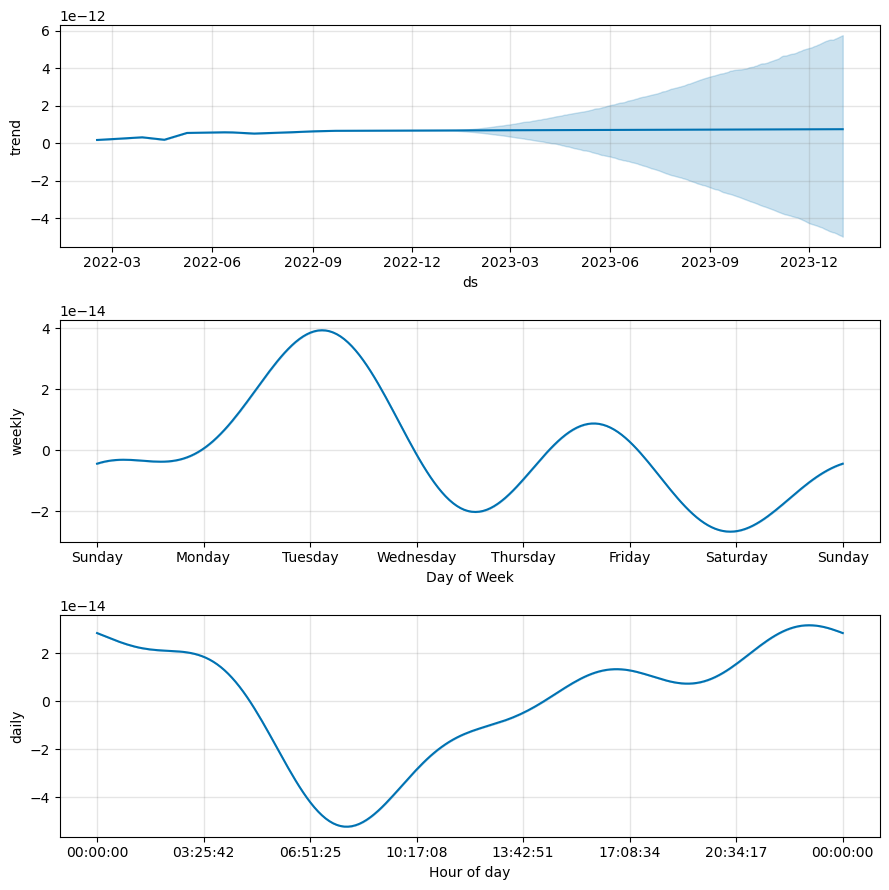

In [48]:
# Plot the trends and patterns
df_prophet.plot_components(df_forecast)
pyplot.savefig('components_forecast_jaguatirica.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


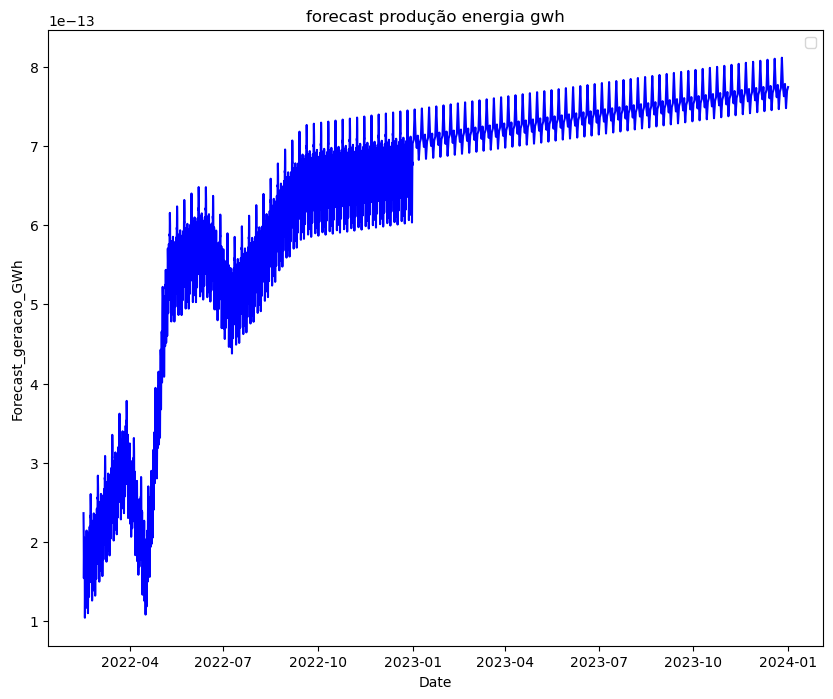

In [49]:
#Plotar o gráfico da previsão
pyplot.figure(figsize=(10, 8))
pyplot.plot(df_forecast['ds'], df_forecast['yhat'], 'b-')
pyplot.legend(); pyplot.xlabel('Date'); pyplot.ylabel('Forecast_geracao_GWh')
pyplot.title('forecast produção energia gwh'); 
pyplot.savefig('production_forecast_jaguatirica2.png')

C:\Users\Artuba\AppData\Local\Temp\ipykernel_39056\3108248084.py:9: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.fill_between(df_forecast['ds'].dt.to_pydatetime(), df_forecast['yhat_upper'], df_forecast['yhat_lower'], alpha=0.6, edgecolor = 'k');


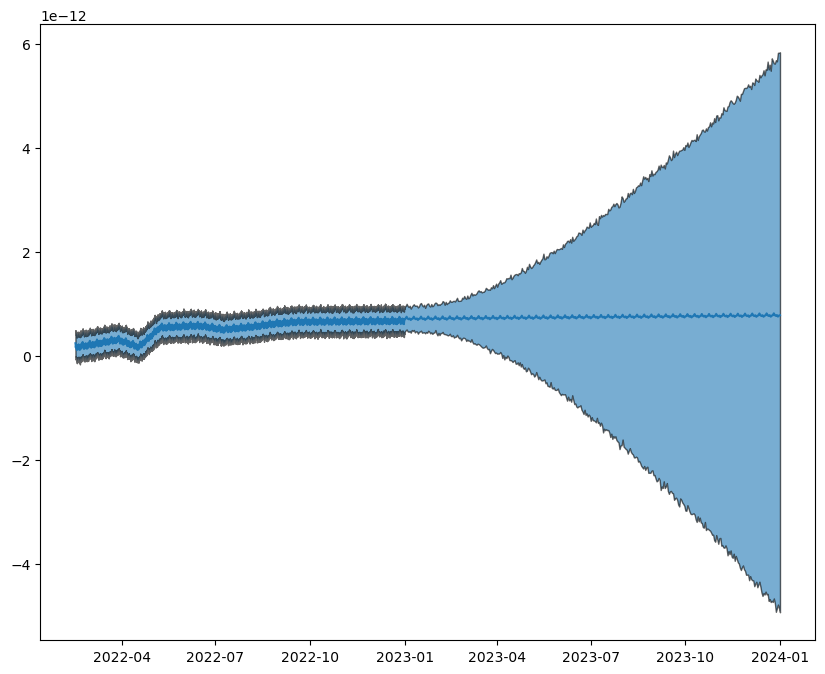

In [50]:
# Create subplots to set figure size
fig, ax = pyplot.subplots(1, 1, figsize=(10, 8));

# Plot estimate
ax.plot(df_forecast['ds'], df_forecast['yhat'], label = 'GWh prediction');

# Plot uncertainty values
ax.fill_between(df_forecast['ds'].dt.to_pydatetime(), df_forecast['yhat_upper'], df_forecast['yhat_lower'], alpha=0.6, edgecolor = 'k');

pyplot.savefig('forecast_wtih_errors_jaguatirica2.png')

In [51]:
#df_forecast = df_forecast.drop(['trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper', 'additive_terms', 'additive_terms_lower', 'additive_terms_upper', 'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower', 'multiplicative_terms_upper'], axis=1)
#Escreve o dataframe em um arquivo csv
df_forecast.to_csv('forecast_jaguatirica2.csv', sep='\t', encoding='utf-8') 